原文链接：手写数字识别项目https://www.aideeplearning.cn/%e6%89%8b%e5%86%99%e6%95%b0%e5%ad%97%e8%af%86%e5%88%ab%e9%a1%b9%e7%9b%ae/

本项目旨在实现一个能够识别手写数字的机器学习模型。这种类型的模型在数字化处理、自动数据录入和图像识别等领域有广泛的应用。本项目使用的是著名的MNIST数据集，该数据集包含了大量的手写数字样本。示例样本如下：

## tensorfow版本

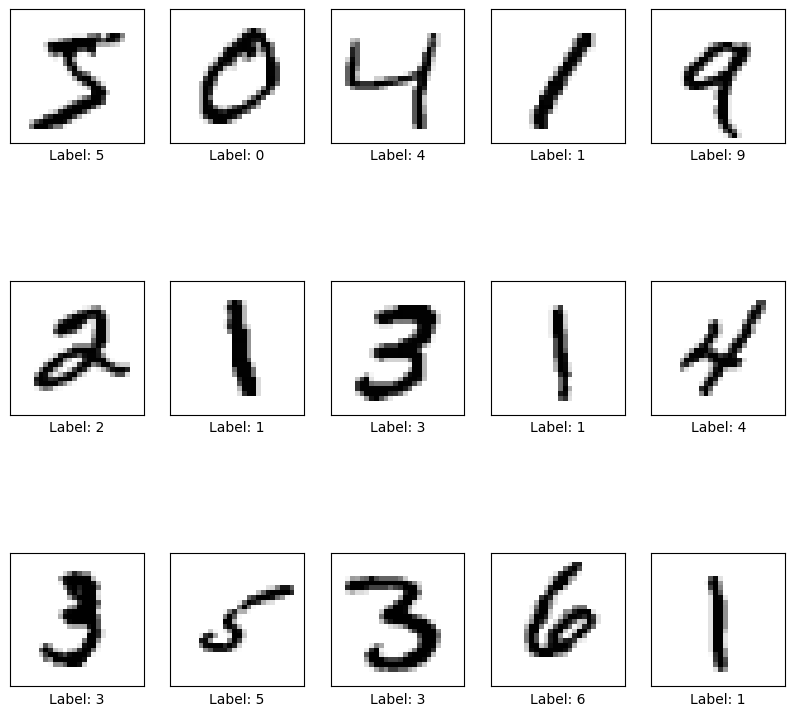

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.8977 - loss: 0.3289 - val_accuracy: 0.9861 - val_loss: 0.0443
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9849 - loss: 0.0501 - val_accuracy: 0.9898 - val_loss: 0.0319
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9912 - loss: 0.0291 - val_accuracy: 0.9897 - val_loss: 0.0324
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9918 - loss: 0.0263 - val_accuracy: 0.9907 - val_loss: 0.0321
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9945 - loss: 0.0178 - val_accuracy: 0.9873 - val_loss: 0.0441
313/313 - 1s - 4ms/step - accuracy: 0.9873 - loss: 0.0441


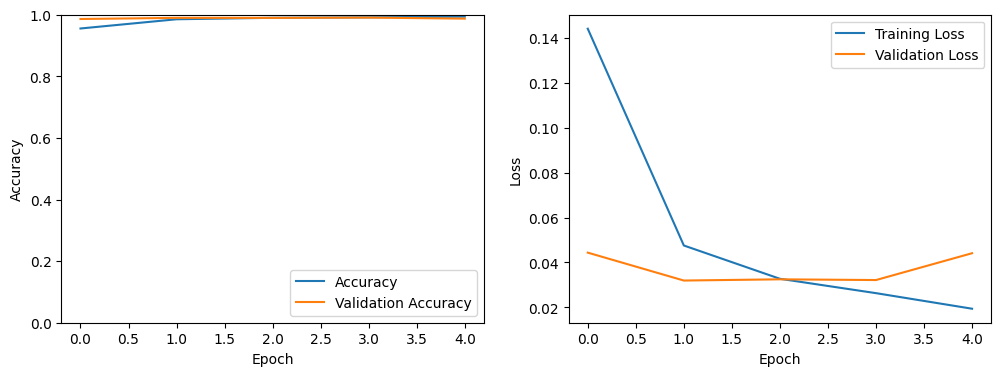

0.9872999787330627

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 第1步：加载和预处理数据
# 使用TensorFlow提供的MINIST数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 归一化数据，将图像数据的像素值标准化到[0,1]，有助于模型更快收敛
x_train, x_test = x_train / 255.0, x_test / 255.0 

# Choose some images to display
num_images = 15
sample_images = x_train[:num_images]
sample_labels = y_train[:num_images]

# Draw chart
plt.figure(figsize=(10,10))
for i in range(num_images):
    plt.subplot(3, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_images[i], cmap=plt.cm.binary)
    plt.xlabel('Label: {}'.format(sample_labels[i]))
plt.show()

# Reshape data to adapt model，将图像数据调整为四维数组
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 第2步：build model
# 使用卷积神经网络CNN，非常适合图像数据
model = models.Sequential([
    # 卷积层
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # 池化层
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Flatten层，将图像从二维数组转换为一维数组
    layers.Flatten(),
    # 全连接层，隐藏层
    layers.Dense(64, activation='relu'),
    # 全连接层
    layers.Dense(10, activation='softmax')
])

# 第3步：compile model
# 使用Adam优化器和交叉熵损失函数
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 第4步：train model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 第5步：evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# 第6步：data visualization
plt.figure(figsize=(12, 4))
# 绘制准确率的变化曲线
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

#绘制损失函数值的变化曲线
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Print accuracy rate
test_acc

## pytorch版本

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 第1步：加载和预处理数据
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# 第2步：定义模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(1600, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 1600)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net()

# 第3步：定义优化器和损失函数
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 第4步：训练模型
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(1, 6):
    train(model, device, train_loader, optimizer, epoch)

# 第5步：评估模型
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

test(model, device, test_loader)


Test set: Average loss: 0.0000, Accuracy: 9902/10000 (99%)

